In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os

In [2]:
kdata = np.load('KeplerSampleFullQ.npy',encoding='bytes')
print(kdata.shape)
print(len(kdata[250][0]))

(2500, 3)
3534


In [3]:
import os
dmints = [-1.2,-0.3,-0.1,-0.05, -0.02,-0.01, -0.006, -0.005, -0.004, -0.0012, 
          -0.001, -0.0006, -0.0003, 0,  0.0003, 0.0006, 0.001, 0.0012, 0.003, 
          0.004, 0.005, 0.006, 0.01, 0.02, 0.05, 0.1, 0.3, 0.6, 1.2]
dtints = [-1.0/145, 1.0/47, 2.0/47, 3.0/47, 4.0/47, 6.0/47, 10.0/47, 15.0/47,
          20.0/47, 30.0/47, 40.0/47,   1.0,   1.2,  
           1.4,  1.5, 1.7,  2, 2.25,  2.5, 3.0, 4, 6 , 9, 15, 20, 30, 45, 60, 90]

def pairwisediffs(arrayoned):
    x = arrayoned.reshape((1,len(arrayoned)))
    xdm = x[:] - np.transpose(x[:])
    xd = xdm[np.triu_indices(len(x[0]), k = 1)]
    return(xd)
def get2dhist(lightcurve):
    xd = pairwisediffs(lightcurve[0])
    yd = pairwisediffs(lightcurve[1])
    H,xe,ye = np.histogram2d(xd,yd,bins=[dtints,dmints],range=None,normed=False)
    G = 255*H/np.sum(H)
    return G

def load_data(directory):
    data = []
    for file in os.listdir(directory):
        data.append(np.load(directory+"/"+file))
    data = np.array(data)
    return data
        

In [4]:
# def first_n_points(n, dir_name):
#     if not os.path.exists(dir_name):
#         os.makedirs(dir_name)
    
#     normalized_x_flux = []
#     normalized_y_flux = []
#     for i, _ in enumerate(kdata):
#         if len(kdata[i][1]) == 3534:
#             normalized_x_flux.append(kdata[i][0])
#             normalized_y_flux.append(kdata[i][1])

#     nx = np.array(normalized_x_flux)
#     ny = np.array(normalized_y_flux)
#     nx = nx[:, :n]
#     ny = ny[:, :n]
#     data = []
#     for i, _ in enumerate(nx):
#         fastdmdt = get2dhist([nx[i],ny[i]])
#         np.save(dir_name + "/" + str(i), fastdmdt.T)
#         data.append(fastdmdt)
                            
                              
#     return np.array(data)

# points_30 = first_n_points(3534, "full_points_final")
# print points_30.shape

In [5]:
data = load_data("full_points_final")

In [6]:
data.shape

(2196, 28, 28)

In [7]:
data[0].shape

(28, 28)

In [8]:
import mpld3
%matplotlib inline 
mpld3.enable_notebook()

In [11]:
import umap
import sklearn
from sklearn.manifold import TSNE
tt = data.reshape(2196, 784)


In [12]:
weird_points = [1781, 536, 1145, 533, 1720, 1328, 1156, 722, 904, 360, 124, 842, 1859, 2496, 392, 1038, 947, 2322, 156, 2138, 193, 2140, 572, 1414]
def plot_lc(emedded_mat, title):
    x = emedded_mat[:, 0]
    y = emedded_mat[:, 1]
    fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
    N = len(x)
#     c = np.random.random(size=N)
#     print c
    hehe = []
    s = []
    for i in range(N):
        if i in weird_points:
            hehe.append(2)
            s.append(30)
        else:
            hehe.append(0)
            s.append(1)
        
    hehe = np.array(hehe)
    s = np.array(s)
    scatter = ax.scatter(x,
                         y,
                         c=hehe,
                         s=s,
                         alpha=0.3)
    ax.grid(color='white', linestyle='solid')

    ax.set_title(title, size=15)

    labels = ['point {0}'.format(i + 1) for i in range(N)]
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)
        


In [34]:
x_embedded_tsne_first = TSNE(n_components=2, perplexity=40, learning_rate=600.0, early_exaggeration=1000.0).fit_transform(tt)
plot_lc(x_embedded_tsne_first, "LC 1 - TSNE")
mpld3.display()

In [30]:
x_embedded_umap_first = umap.UMAP(n_neighbors=10, min_dist=1.0).fit_transform(tt)
plot_lc(x_embedded_umap_first, "LC 1 - UMAP")
mpld3.display()

In [54]:
temp_x = []
temp_y = []
for i, _ in enumerate(kdata):
    if len(kdata[i][1]) == 3534:
        temp_x.append(kdata[i][0])
        temp_y.append(kdata[i][1])
temp_x = np.array(temp_x)
temp_y = np.array(temp_y)


def plot_num(num):
    x_temp = temp_x[num]
    y_temp = temp_y[num]
    plt.plot(x_temp, y_temp)
    plt.show()

In [ ]:
# for the UMAP ones, five different ones are 1033, 2146, 1782, 2024, 1304 (going left to right)

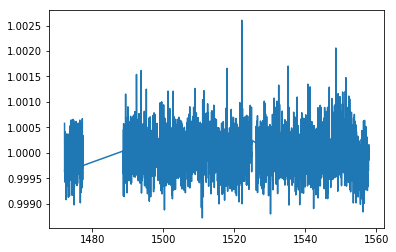

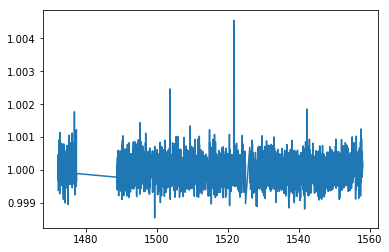

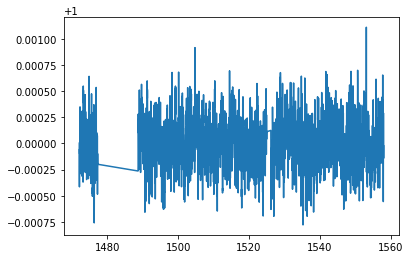

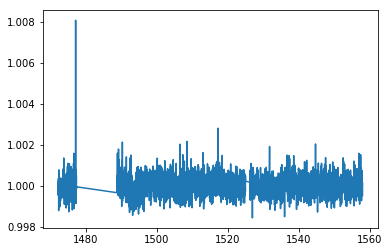

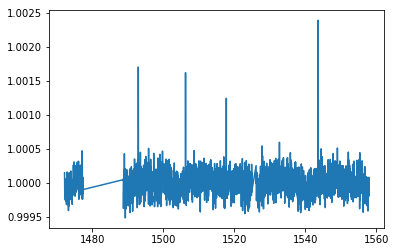

In [59]:
plot_num(1033)
plot_num(2146)
plot_num(1782)
plot_num(2024)
plot_num(1304)

In [60]:
# for the tsne ones, different ones are 298, 513, 905, 1704, 910 (left to right)

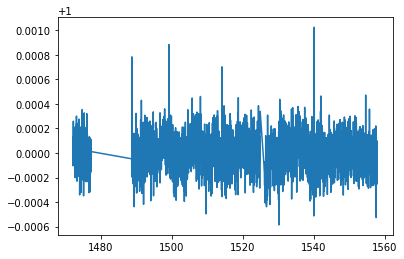

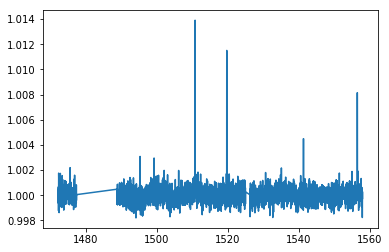

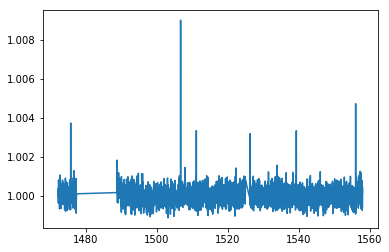

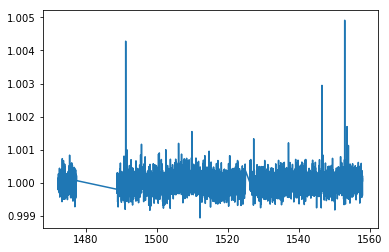

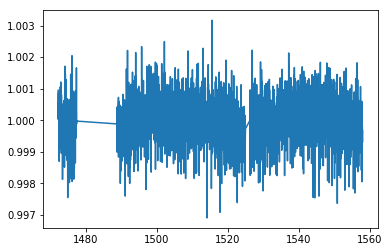

In [61]:
plot_num(298)
plot_num(513)
plot_num(905)
plot_num(1704)
plot_num(910)